In [2]:
import pandas as pd


matches_df = pd.read_csv('../data/IPL_Matches_2008_2022.csv')


print(matches_df.head())



matches_df.isnull().sum()


        ID       City        Date Season  MatchNumber  \
0  1312200  Ahmedabad  2022-05-29   2022        Final   
1  1312199  Ahmedabad  2022-05-27   2022  Qualifier 2   
2  1312198    Kolkata  2022-05-25   2022   Eliminator   
3  1312197    Kolkata  2022-05-24   2022  Qualifier 1   
4  1304116     Mumbai  2022-05-22   2022           70   

                         Team1                 Team2  \
0             Rajasthan Royals        Gujarat Titans   
1  Royal Challengers Bangalore      Rajasthan Royals   
2  Royal Challengers Bangalore  Lucknow Super Giants   
3             Rajasthan Royals        Gujarat Titans   
4          Sunrisers Hyderabad          Punjab Kings   

                              Venue            TossWinner TossDecision  \
0  Narendra Modi Stadium, Ahmedabad      Rajasthan Royals          bat   
1  Narendra Modi Stadium, Ahmedabad      Rajasthan Royals        field   
2             Eden Gardens, Kolkata  Lucknow Super Giants        field   
3             Eden Garde

ID                   0
City                51
Date                 0
Season               0
MatchNumber          0
Team1                0
Team2                0
Venue                0
TossWinner           0
TossDecision         0
SuperOver            4
WinningTeam          4
WonBy                0
Margin              18
method             931
Player_of_Match      4
Team1Players         0
Team2Players         0
Umpire1              0
Umpire2              0
dtype: int64

In [3]:
matches_df['Team1'].value_counts()

Team1
Royal Challengers Bangalore    126
Mumbai Indians                 112
Chennai Super Kings            111
Kolkata Knight Riders          105
Kings XI Punjab                 92
Rajasthan Royals                89
Delhi Daredevils                85
Sunrisers Hyderabad             69
Deccan Chargers                 39
Delhi Capitals                  29
Pune Warriors                   23
Punjab Kings                    18
Gujarat Lions                   16
Lucknow Super Giants             8
Gujarat Titans                   7
Rising Pune Supergiant           7
Rising Pune Supergiants          7
Kochi Tuskers Kerala             7
Name: count, dtype: int64

In [6]:

frequent_teams = matches_df['Team1'].value_counts()[matches_df['Team1'].value_counts() >7].index

filtered_matches_df = matches_df[matches_df['Team1'].isin(frequent_teams)]

print(filtered_matches_df['Team1'].value_counts())


Team1
Royal Challengers Bangalore    126
Mumbai Indians                 112
Chennai Super Kings            111
Kolkata Knight Riders          105
Kings XI Punjab                 92
Rajasthan Royals                89
Delhi Daredevils                85
Sunrisers Hyderabad             69
Deccan Chargers                 39
Delhi Capitals                  29
Pune Warriors                   23
Punjab Kings                    18
Gujarat Lions                   16
Lucknow Super Giants             8
Name: count, dtype: int64



Season-wise Head to Head Statistics: Mumbai Indians vs Chennai Super Kings
         Mumbai Indians  Chennai Super Kings
Season                                      
2007/08               1                    1
2009                  1                    1
2009/10               1                    2
2011                  1                    0
2012                  2                    1
2013                  3                    1
2014                  0                    3
2015                  3                    1
2018                  1                    1
2019                  4                    0
2020/21               1                    1
2021                  1                    1
2022                  1                    1


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4248\2158565564.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  seasonal_stats = team_matches.groupby('Season').apply(


,Mumbai Indians,Chennai Super Kings
Season,,
2007/08,1,1
2009,1,1
2009/10,1,2
2011,1,0
2012,2,1
2013,3,1
2014,0,3
2015,3,1
2018,1,1


<Figure size 1200x600 with 0 Axes>

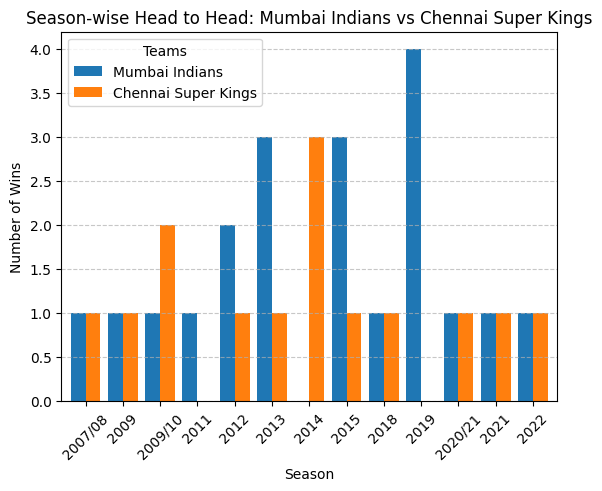

In [11]:
# Create season-wise head-to-head analysis
def seasonal_h2h_analysis(team1, team2):
    # Filter matches between these two teams
    team_matches = filtered_matches_df[
        ((filtered_matches_df['Team1'] == team1) & (filtered_matches_df['Team2'] == team2)) |
        ((filtered_matches_df['Team1'] == team2) & (filtered_matches_df['Team2'] == team1))
    ]
    
    # Group by season and get wins
    seasonal_stats = team_matches.groupby('Season').apply(
        lambda x: pd.Series({
            team1: len(x[x['WinningTeam'] == team1]),
            team2: len(x[x['WinningTeam'] == team2])
        })
    ).fillna(0)
    
    # Plotting
    plt.figure(figsize=(12, 6))
    seasonal_stats.plot(kind='bar', width=0.8)
    plt.title(f'Season-wise Head to Head: {team1} vs {team2}')
    plt.xlabel('Season')
    plt.ylabel('Number of Wins')
    plt.legend(title='Teams')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Print statistics
    print(f"\nSeason-wise Head to Head Statistics: {team1} vs {team2}")
    print(seasonal_stats)
    
    return seasonal_stats

# Import matplotlib
import matplotlib.pyplot as plt

# Example usage
seasonal_h2h_analysis('Mumbai Indians', 'Chennai Super Kings')


In [12]:
# Save the filtered dataframe to a new CSV file
filtered_matches_df.to_csv('../data/filtered_ipl_matches.csv', index=False)
